### Arbeidskrav 1 - Gustav Gabrielsen 

### Oppgave 1: Modellen inneholder en rekke parametere. Definer disse paramterene under:

- Lambda: $\lambda$

Lambda (𝜆):  Lamba representerer andelen av den globale arbeidsstyrken i produksjonssektoren som er lokalisert i en gitt region på et bestemt tidspunkt. Lamba er dynamisk. 

- Rho: $\rho$

Rho (𝜌): Brukes for å indikere graden av produktsubstituerbarharhet i modellen for monopolitisk konkurranse. Det er definert som $(\sigma - 1)/\sigma$, hvor $\sigma$ er elastisiteten av substitusjon.

- Phi: $\phi$

Phi (𝜙): Eksogent gitt andel av den globale landbruksarbeidsstyrken som hver region er tilordent hver region. Phi er konstant.   

- Gamma: $\gamma$

Gamma (𝛾): Gamma representerer andelen av økonomisk aktivitet som er knyttet til arbeidskraft. Dette kan også brukes til å modellere fordelingen av produksjon mellom ulike sektorer, slik som jordbruk og industri, hvor arbeidsintensiteten varierer.

- T: $T$

T: T representerer transportkostnader mellom regioner. I denne modellen representeres transportkostander som en fraksjon av varenes verdi, dette betyr at transport ikke innebærer noen direkte pengeoverføringer, istedenfor blir kostnadene sett på som en reduksjon i mengden varer som ankommer. Dette gjøres for å unngå å måtte modellere en seperat transport industri. 

Jeg klarte ikke finne noen definisjoner av de siste parameterne ved bruk av kapittel 4 og 5 i "The Spatial Economy: Cities, Regions, and International Trade", men jeg har gitt de en betydning ved å se på deres bruk i funksjonen. 

- Betta: $\beta$

Beta (𝛽): Beta brukes for å beskrive forholdet mellom to variabler, som en elastisitet. 

- Epsilon: $\epsilon$ 

Epsilon (𝜖): Representerer elastitsiteten eller følsomheten modellen har til endringer i W.  

- Delta: $\delta$

Delta (𝛿): Brukes som en avskrivningsrate som påvirker verdien av W. 

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Funksjon for å kalkulere w1/w2 raten
def calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    lmbda1 = lambda_val
    lmbda2 = 1 - lmbda1

    def calc_Y(lmbda, W):
        return lmbda * gamma * L * W + phi1 * (1 - gamma) * L

    def calc_I(lmbdar, Wr, lmbdan, Wn):
        const = (beta / rho) * ((gamma * L) / (alpha * epsilon))**(1 / (1 - epsilon))
        return const * (lmbdar * Wr**(1 - epsilon) + lmbdan * T**(1 - epsilon) * Wn**(1 - epsilon))**(1 / (1 - epsilon))

    def calc_W(Yr, Ir, Yn, In):
        const = (rho * beta**(-rho)) * (delta / ((epsilon - 1) * alpha))**(1 / epsilon)
        return const * (Yr * Ir**(epsilon - 1) + Yn * T**(1 - epsilon) * In**(epsilon - 1))**(1 / epsilon)

    W1 = 1
    W2 = 1
    iterations = 0

    while True:
        Y1 = calc_Y(lmbda1, W1)
        Y2 = calc_Y(lmbda2, W2)
        I1 = calc_I(lmbda1, W1, lmbda2, W2)
        I2 = calc_I(lmbda2, W2, lmbda1, W1)
        new_W1 = calc_W(Y1, I1, Y2, I2)
        new_W2 = calc_W(Y2, I2, Y1, I1)
        w1 = new_W1 * I1**(-delta)
        w2 = new_W2 * I2**(-delta)
        
        criterion1 = abs((new_W1 - W1) / W1)
        criterion2 = abs((new_W2 - W2) / W2)

        if criterion1 < LIMIT and criterion2 < LIMIT:
            break
        
        W1 = new_W1
        W2 = new_W2
        iterations += 1

    return w1 / w2

# Funksjon for å simulere modellen
def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulering for benchmark verdier
lambda_values = np.arange(0, 1.1, 0.1)

# Definer konstanter (disse må du justere basert på hva som er spesifikt for ditt scenario)
gamma = 0.4
L = 1
phi1 = 0.5
beta = 0.8
rho = 0.8
alpha = 0.1
epsilon = 5
delta = 0.4
T = 1.7
LIMIT = 0.0001

benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Skriv ut resultatene
print(benchmark_ratios)

[0.97827655 0.99317911 1.00278747 1.00686527 1.00535653 1.
 0.99467201 0.99318154 0.99722028 1.00686773 1.02220584]


### Oppgave 2: Ved hjelp av koden på bunnen av oppgaven, simuler modellen ved bruk av benchmark-verdiene: 

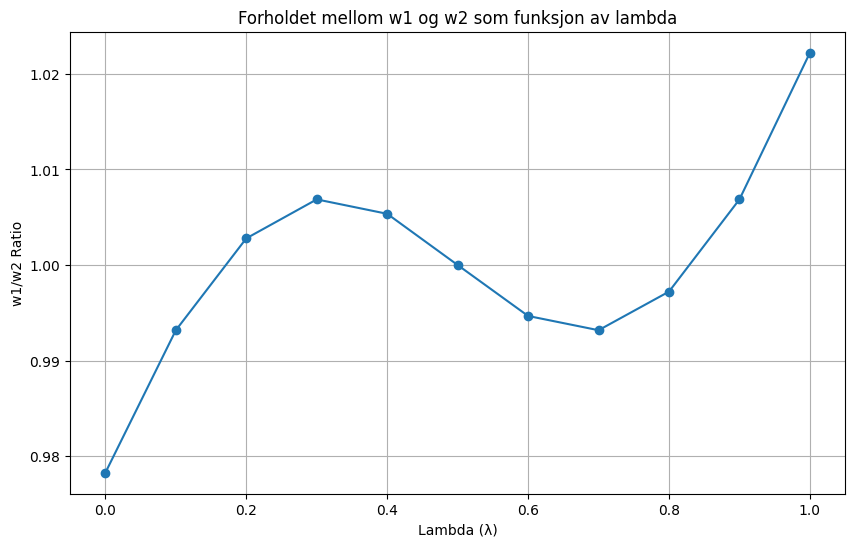

In [4]:
def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulerer for et sett av lambda-verdier fra 0 til 1
lambda_values = np.linspace(0, 1, 11)
benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Plotter resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios, marker='o')
plt.title('Forholdet mellom w1 og w2 som funksjon av lambda')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.grid(True)
plt.show()

Resultatene viser w1/w2-raten for ulike verdier av lambda (λ), hvor lambda representerer andelen av total befolkning eller ressurser i "sentrum".

- Når lambda er 0.0, er hele befolkningen eller ressursene i "periferien", og w1/w2-raten er lavere enn 1, som indikerer at lønningene i "sentrum" er lavere sammenlignet med "periferien".

- Ettersom lambda øker og nærmer seg 0.5, ser vi at w1/w2-raten nærmer seg 1, hvilket betyr at lønnsforskjellene mellom sentrum og periferi blir mindre.

- Ved lambda = 0.5, er ressursene jevnt fordelt mellom sentrum og periferi, og w1/w2-raten er nøyaktig 1, noe som indikerer lik lønn i begge regioner.

- Når lambda fortsetter å øke og nærmer seg 1.0, hvor nesten alle ressurser er i "sentrum", ser vi at w1/w2-raten stiger over 1. Dette viser at lønningene i "sentrum" er høyere enn i "periferien".

- Ved lambda = 1.0, hvor alle ressurser er i "sentrum", er w1/w2-raten tydelig høyere enn 1, som indikerer betydelig høyere lønninger i "sentrum" sammenlignet med "periferien".

Grafen viser hvordan lønnsforholdet varierer med endringer i befolknings- eller ressursfordelingen mellom "sentrum" og "periferi". Dette illustrerer en typisk sentrum-periferi dynamikk hvor geografisk konsentrasjon av ressurser (folk eller kapital) kan påvirke lønnsnivået betydelig.

### Oppgave 3: I deloppgavene må du variere parameterne. Hver underoppgave løses i et vakuum, så for eksempel etter oppgave a) er fullført så settes T tilbake til 1.7 før neste oppgave løses. Vis gjerne grafisk. 

a)  T endres fra 1.7 til 1.2, hvordan endrer w1/w2 raten seg? For hvilke verdier av 𝜆 vil 
bedriftene agglomerere i region 1? 

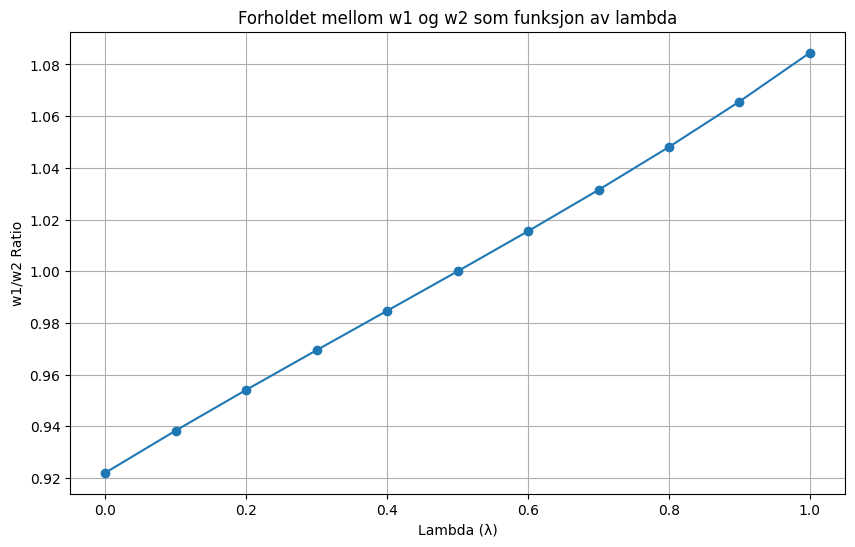

In [9]:
T = 1.2

def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulerer for et sett av lambda-verdier fra 0 til 1
lambda_values = np.linspace(0, 1, 11)
benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Plotter resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios, marker='o')
plt.title('Forholdet mellom w1 og w2 som funksjon av lambda')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.grid(True)
plt.show()

Når handelskostnaden 𝑇 reduseres fra 1.7 til 1.2, observerer vi følgende endringer i w1/w2-raten:
Reduksjonen i 𝑇 fører til at forholdet 𝑤1/𝑤2 øker for høyere verdier av 𝜆. Dette indikerer at lønningene i region 1 (sentrum) blir relativt høyere sammenlignet med region 2 (periferien) når handelskostnadene mellom regionene synker. Dette kan forklares med at lavere handelskostnader gjør det mer lønnsomt for bedrifter å agglomerere i regionen med høyere λ (sentrum), siden transport av varer mellom regionene blir billigere og mindre restriktiv.

Fra grafen ser vi at 𝑤1/𝑤2 er større enn 1 når 𝜆 er 0.6 eller høyere. Dette betyr at for disse verdiene av 𝜆 vil bedriftene tendere til å agglomerere i region 1. Disse verdiene indikerer at når majoriteten av ressursene eller befolkningen er lokalisert i region 1, blir denne regionen mer attraktiv økonomisk sett, ytterligere forsterket av lavere handelskostnader.

b)  Andel bønder i region 2 øker fra 0.5 til 0.7? Hva skjer med w1/w2 raten?

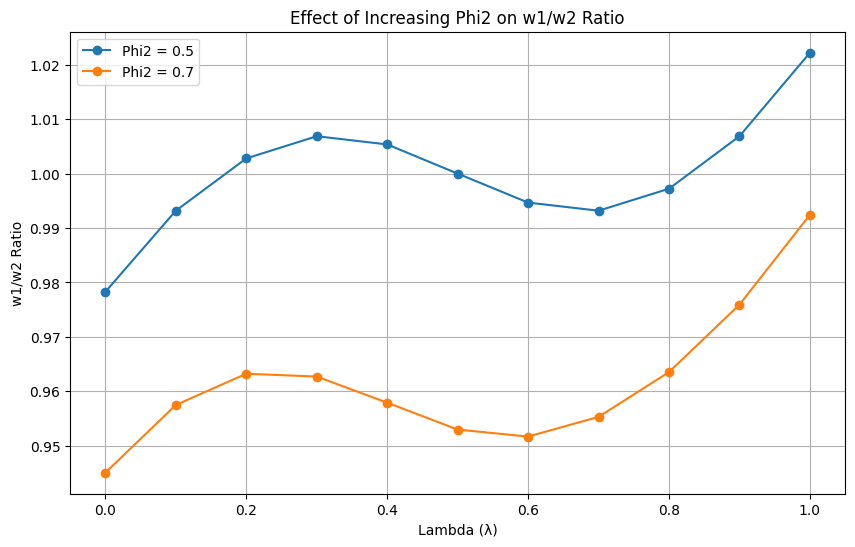

In [15]:
phi1 = 0.5
phi2 = 0.7

import numpy as np
import matplotlib.pyplot as plt

# Funksjon for å kalkulere w1/w2 raten med spesifisert phi2 for region 2
def calculate_w_ratio_adjusted_phi2(lambda_val, gamma, L, phi1, phi2, beta, rho, alpha, epsilon, delta, T, LIMIT):
    lmbda1 = lambda_val
    lmbda2 = 1 - lmbda1

    def calc_Y(lmbda, W, phi):
        return lmbda * gamma * L * W + phi * (1 - gamma) * L

    def calc_I(lmbdar, Wr, lmbdan, Wn):
        const = (beta / rho) * ((gamma * L) / (alpha * epsilon))**(1 / (1 - epsilon))
        return const * (lmbdar * Wr**(1 - epsilon) + lmbdan * T**(1 - epsilon) * Wn**(1 - epsilon))**(1 / (1 - epsilon))

    def calc_W(Yr, Ir, Yn, In):
        const = (rho * beta**(-rho)) * (delta / ((epsilon - 1) * alpha))**(1 / epsilon)
        return const * (Yr * Ir**(epsilon - 1) + Yn * T**(1 - epsilon) * In**(epsilon - 1))**(1 / epsilon)

    W1 = 1
    W2 = 1
    iterations = 0

    while True:
        Y1 = calc_Y(lmbda1, W1, phi1)
        Y2 = calc_Y(lmbda2, W2, phi2)
        I1 = calc_I(lmbda1, W1, lmbda2, W2)
        I2 = calc_I(lmbda2, W2, lmbda1, W1)
        new_W1 = calc_W(Y1, I1, Y2, I2)
        new_W2 = calc_W(Y2, I2, Y1, I1)
        w1 = new_W1 * I1**(-delta)
        w2 = new_W2 * I2**(-delta)
        
        criterion1 = abs((new_W1 - W1) / W1)
        criterion2 = abs((new_W2 - W2) / W2)

        if criterion1 < LIMIT and criterion2 < LIMIT:
            break
        
        W1 = new_W1
        W2 = new_W2
        iterations += 1

    return w1 / w2

# Oppsett av konstanter og lambda-verdier
gamma = 0.4
L = 1
phi1 = 0.5  # Produktivitet i region 1
phi2_original = 0.5  # Original produktivitet i region 2
phi2_new = 0.7  # Ny produktivitet i region 2
beta = 0.8
epsilon = 5
delta = 0.4
alpha = (gamma * L / epsilon)
rho = 1 - (1 / epsilon)
T = 1.7
LIMIT = 0.0001
lambda_values = np.linspace(0, 1, 11)

# Simulering for begge scenariene
original_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
new_phi2_ratios = np.array([calculate_w_ratio_adjusted_phi2(lam, gamma, L, phi1, phi2_new, beta, rho, alpha, epsilon, delta, T, LIMIT) for lam in lambda_values])

# Plotting av resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, original_ratios, 'o-', label='Phi2 = 0.5')
plt.plot(lambda_values, new_phi2_ratios, 'o-', label='Phi2 = 0.7')
plt.title('Effect of Increasing Phi2 on w1/w2 Ratio')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.legend()
plt.grid(True)
plt.show()

Ved å øke produktiviteten for bønder i region 2 fra 0.5 til 0.7 ser vi endringer i 𝑤1/𝑤2 som følger:

Den oppdaterte grafen viser at 𝑤1/𝑤2- raten blir lavere for de fleste verdier av 𝜆 når produktiviteten i region 2 (phi2) økes til 0.7. Dette indikerer at lønningene i region 2 relativt sett blir bedre sammenlignet med region 1 når produktiviteten øker.

En økt produktivitet i region 2 gjør regionen mer attraktiv økonomisk, som kan lede til en bedre balanse mellom lønninger mellom de to regionene, eller til og med en fordel for region 2 hvis produktivitetsøkningen er signifikant nok. Disse resultatene illustrerer hvordan en økning i produktivitet i "periferien" (region 2) kan minske lønnsforskjellene mellom sentrum og periferien, og potensielt bidra til en mer balansert økonomisk utvikling mellom de to regionene.

In [ ]:
# Definerer konstantene fra benchmark-verdiene
gamma = 0.4
L = 1
phi1 = 0.5
beta = 0.8
epsilon = 5
delta = 0.4
alpha = (gamma * L / epsilon)
rho = 1 - (1 / epsilon)
T = 1.7
LIMIT = 0.0001
lambda_values = np.linspace(0, 1, 100)  # Bruker en finere oppløsning for mer detaljert analyse

# Kjør simuleringen
benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Plotter resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios, marker='o', linestyle='-')
plt.title('w1/w2 Ratio Across Different λ Values')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.grid(True)
plt.show()

# Identifiserer agglomerering
# (Se etter ekstreme verdier hvor w1/w2 enten går mot veldig høye eller veldig lave verdier.)
agglomerative_lambdas = lambda_values[(benchmark_ratios > 10) | (benchmark_ratios < 0.1)]  # Dette tallet 10 er vilkårlig for ekstrem agglomerering
agglomerative_lambdas